In [71]:
import os
import pandas as pd
import numpy as np

In [72]:
os.getcwd()

'E:\\Insofe\\PH.D\\PHD_ML'

In [73]:
os.chdir("E:\Insofe\PH.D\PHD_ML")

In [74]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

# Data Read and Sanitizing the Input

In [75]:
input_file = codecs.open("Train-1554810061973.csv", "r", encoding='utf-8', errors='replace')
output_file = open("all_hotel_review_relevant_cols_clean.csv", "w", encoding='utf-8')

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

In [76]:
hotels_review = pd.read_csv("Train-1554810061973.csv")
hotels_review.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


In [77]:
hotels_review.tail()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
6282,Review_6283,hotel_200,hotel_10272,"Jul 31, 2004",A Very Nice Boutique Hotel Had a recent stay i...,good
6283,Review_6284,hotel_200,hotel_1120,"Jul 16, 2004",My Home in NYC I happened upon the Giraffe in ...,excellent
6284,Review_6285,hotel_200,hotel_7086,"Jul 8, 2004",Fantastic New York Hotel! My husband and I don...,excellent
6285,Review_6286,hotel_200,hotel_7909,"Jun 18, 2004",It's our new favorite hotel!! After staying at...,excellent
6286,Review_6287,hotel_200,hotel_4472,"May 18, 2004",Terrific Hotel in the Union Square/Grammercy P...,excellent


In [78]:
hotels_review.describe()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
count,6287,6287,6287,6287,6287,6287
unique,6287,100,6100,1310,6287,3
top,Review_281,hotel_188,hotel_4370,"May 29, 2007",New Favorite Place My husband and I recently h...,good
freq,1,521,4,21,1,3213


# Few Regular expressions to clean up data and saving it for later use

In [79]:
def standardize_body(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

hotels_review = standardize_body(hotels_review, "reviewtext")

hotels_review.to_csv("hotels_clean_data.csv")
hotels_review.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","good hotel, charges for internet access the ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small but adequate rooms if you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","better than average, some noisy rooms i have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",ordinary although it is highly rated in these ...,bad


In [80]:
hotels_clean_reviews = pd.read_csv("hotels_clean_data.csv")
hotels_clean_reviews.tail()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
6282,6282,Review_6283,hotel_200,hotel_10272,"Jul 31, 2004",a very nice boutique hotel had a recent stay i...,good
6283,6283,Review_6284,hotel_200,hotel_1120,"Jul 16, 2004",my home in nyc i happened upon the giraffe in ...,excellent
6284,6284,Review_6285,hotel_200,hotel_7086,"Jul 8, 2004",fantastic new york hotel! my husband and i don...,excellent
6285,6285,Review_6286,hotel_200,hotel_7909,"Jun 18, 2004",it's our new favorite hotel!! after staying at...,excellent
6286,6286,Review_6287,hotel_200,hotel_4472,"May 18, 2004",terrific hotel in the union square grammercy p...,excellent


In [81]:
hotels_clean_reviews.groupby("Sentiment").count()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext
Sentiment,,,,,,
bad,1103,1103,1103,1103,1103,1103
excellent,1971,1971,1971,1971,1971,1971
good,3213,3213,3213,3213,3213,3213


# Data is clean, now it needs to be prepared

In [82]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

hotels_clean_reviews["tokens"] = hotels_clean_reviews["reviewtext"].apply(tokenizer.tokenize)
hotels_clean_reviews.head()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,tokens
0,0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view of my king bed room,good,"[nice, marriot, view, of, my, king, bed, room]"
1,1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","good hotel, charges for internet access the ma...",good,"[good, hotel, charges, for, internet, access, ..."
2,2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small but adequate rooms if you have an early ...,good,"[small, but, adequate, rooms, if, you, have, a..."
3,3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","better than average, some noisy rooms i have s...",good,"[better, than, average, some, noisy, rooms, i,..."
4,4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",ordinary although it is highly rated in these ...,bad,"[ordinary, although, it, is, highly, rated, in..."


# Inspecting dataset to find Total Words, Max Sentence Length

In [83]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in hotels_clean_reviews["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in hotels_clean_reviews["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1077320 words total, with a vocabulary size of 21370
Max sentence length is 1446


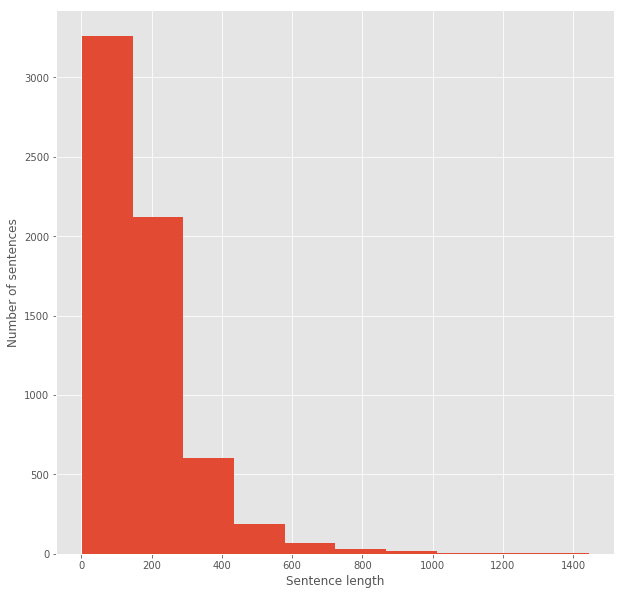

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

# Checking the Class balance

In [129]:
hotels_clean_reviews.Sentiment.value_counts()

1    3213
2    1971
0    1103
Name: Sentiment, dtype: int64

In [128]:
hotels_clean_reviews.Sentiment[hotels_clean_reviews.Sentiment == 'bad'] = 0
hotels_clean_reviews.Sentiment[hotels_clean_reviews.Sentiment == 'good'] = 1
hotels_clean_reviews.Sentiment[hotels_clean_reviews.Sentiment == 'excellent'] = 2

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Calculate the number of words in each body

In [130]:
hotels_clean_reviews['num_words'] = hotels_clean_reviews.reviewtext.apply(lambda x : len(x.split()))

In [131]:
hotels_clean_reviews.head()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,tokens,num_words,bins
0,0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view of my king bed room,1,"[nice, marriot, view, of, my, king, bed, room]",8,0-100
1,1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","good hotel, charges for internet access the ma...",1,"[good, hotel, charges, for, internet, access, ...",232,100-300
2,2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small but adequate rooms if you have an early ...,1,"[small, but, adequate, rooms, if, you, have, a...",128,100-300
3,3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","better than average, some noisy rooms i have s...",1,"[better, than, average, some, noisy, rooms, i,...",669,500-800
4,4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",ordinary although it is highly rated in these ...,0,"[ordinary, although, it, is, highly, rated, in...",207,100-300


In [132]:
hotels_clean_reviews['num_words'].describe()


count    6287.000000
mean      169.601718
std       142.048814
min         1.000000
25%        81.000000
50%       140.000000
75%       221.000000
max      1425.000000
Name: num_words, dtype: float64

Binning the No of Words for better understanding of how the words are ditributed

In [133]:
bins=[0,50,75, np.inf]
hotels_clean_reviews['bins']=pd.cut(hotels_clean_reviews.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [134]:
word_distribution = hotels_clean_reviews.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [135]:
# Let us see how the words are distributed
word_distribution.head(6)

,bins,counts
0,0-100,2063
1,100-300,3408
2,300-500,621
3,500-800,159
4,>800,36


From the above distribution we can easily understand that for maximum sentences (~9%) the length of the words is below 300
Let us visualize the words ditribution per bin

Text(0.5,1,'Word distribution per bin')

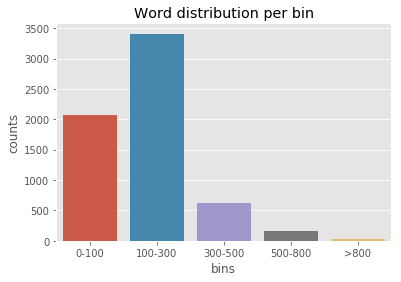

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [137]:
hotels_clean_reviews.head()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,tokens,num_words,bins
0,0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view of my king bed room,1,"[nice, marriot, view, of, my, king, bed, room]",8,0-100
1,1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","good hotel, charges for internet access the ma...",1,"[good, hotel, charges, for, internet, access, ...",232,100-300
2,2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small but adequate rooms if you have an early ...,1,"[small, but, adequate, rooms, if, you, have, a...",128,100-300
3,3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","better than average, some noisy rooms i have s...",1,"[better, than, average, some, noisy, rooms, i,...",669,500-800
4,4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",ordinary although it is highly rated in these ...,0,"[ordinary, although, it, is, highly, rated, in...",207,100-300


# Bag of Words Counts

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = hotels_clean_reviews["reviewtext"].tolist()
list_labels = hotels_clean_reviews["Sentiment"].tolist()
num_class = len(np.unique(hotels_clean_reviews.Sentiment.values))
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Visualizing the embedings

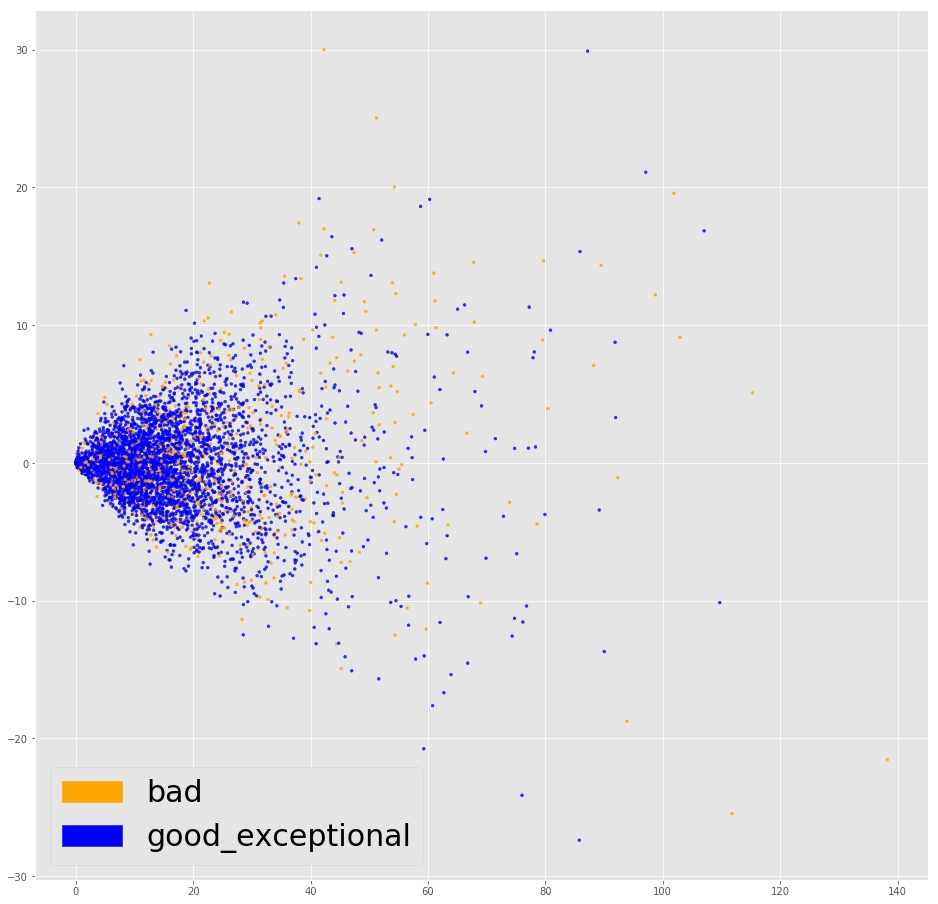

In [139]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue', 'blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=color_column, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='bad')
            green_patch = mpatches.Patch(color='blue', label='good_exceptional')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

# Fitting Logistic Regression classifier to just see how it works

In [144]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 0.199, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, max_iter = 1000, random_state=14321)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [145]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.695, precision = 0.696, recall = 0.695, f1 = 0.694


# MODEL INSPECTION USING CONFUSION MATRIX

In [146]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

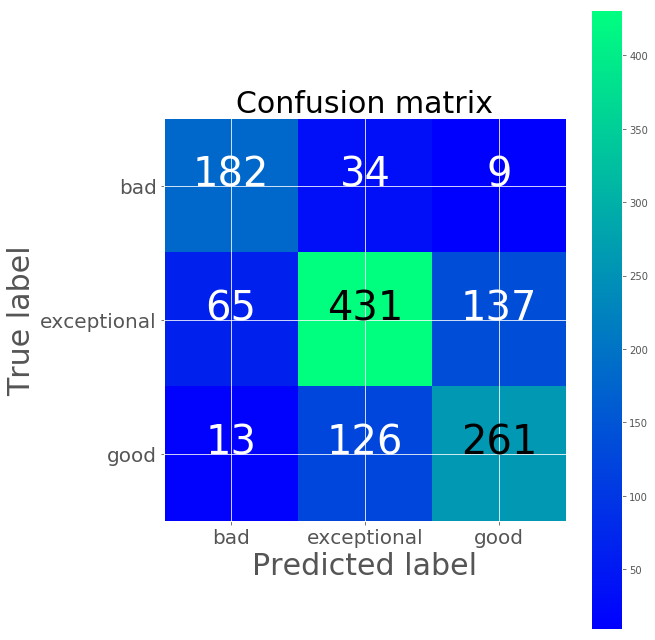

[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [147]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(9, 9))
plot = plot_confusion_matrix(cm, classes=['bad','exceptional','good'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

Logistic Regression struggling to classify Urgency 0,1 and 2. This is not surprising bad and exceptional sentiments are undersampled. 

Let us look at the features(words) used in model to make decisions on reviews

In [148]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes
importance = get_most_important_features(count_vectorizer, clf, 10)
print(importance)

{0: {'tops': [(0.4878773731219215, 'horrible'), (0.49073937505504944, 'wouldn'), (0.5047774899497686, 'walls'), (0.547083082773244, 'tiny'), (0.5567182149651153, 'noisy'), (0.5654353360059596, 'disappointing'), (0.6570865781226696, 'dirty'), (0.6858293487976601, 'awful'), (0.7062321038091878, 'worst'), (0.720365528646321, 'terrible')], 'bottom': [(-0.4354442975791747, 'amazing'), (-0.4567930272299534, 'helpful'), (-0.47946940793770265, 'lovely'), (-0.5001000188977794, 'fantastic'), (-0.5594773204373134, 'wonderful'), (-0.5829482516380262, 'loved'), (-0.6140151000787297, 'comfortable'), (-0.635538253094879, 'excellent'), (-0.7358750351248227, 'great'), (-0.7448476354465057, 'perfect')]}, 1: {'tops': [(0.3348834183328206, 'bit'), (0.3377387886440863, 'pleasant'), (0.34232766263059106, 'moved'), (0.35139163818820174, 'slightly'), (0.35713770851192866, 'ok'), (0.35781416487108536, 'complaints'), (0.36471714811563766, 'buildings'), (0.38705934362027977, 'satisfied'), (0.4089701678189902, 'r

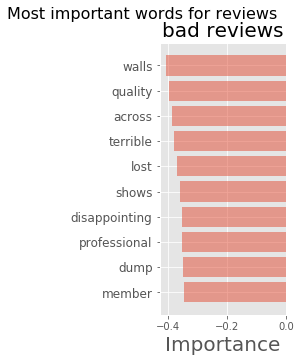

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


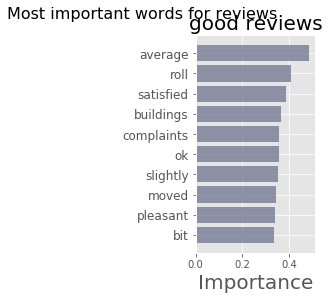

In [149]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(5, 5))  
    
    y_pos = np.arange(len(bottom_words))
    plt.subplot(122)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('bad reviews', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=12)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    plt.show()
    
    y_pos = np.arange(len(top_words))
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('great reviews', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=12)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('good reviews', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=12)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for reviews")

# TFIDF Bag of Words
On top of our bag of words model, Let us use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [150]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

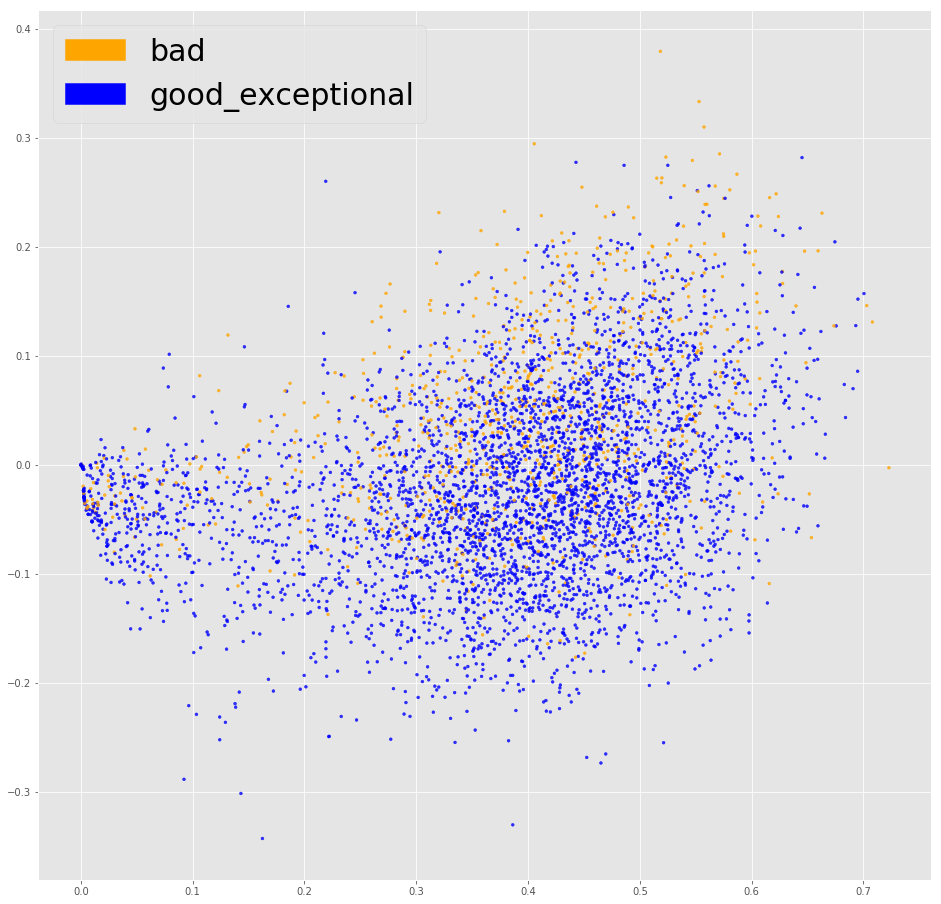

In [151]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [152]:
clf_tfidf = LogisticRegression(C=1.95, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, max_iter = 200, random_state=14321)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [153]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.702, precision = 0.704, recall = 0.702, f1 = 0.701


# Little more accuracy, precision, recall and f1 score when compared to previous model

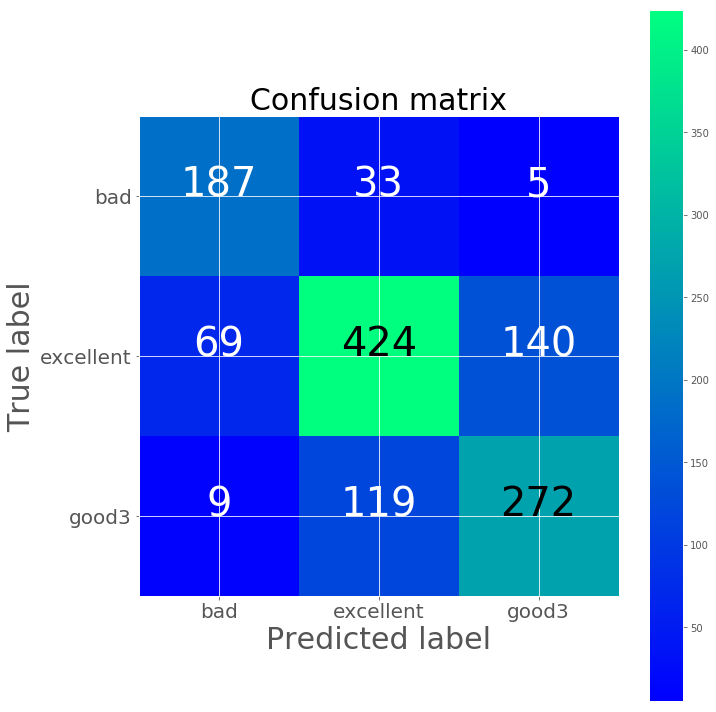

TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [154]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['bad','excellent','good3'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

In [155]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

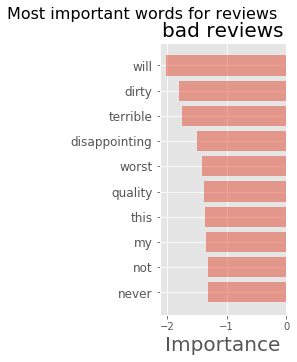

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


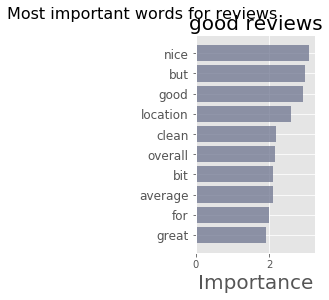

In [156]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]

bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]


plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for reviews")

In [157]:
hotels_clean_reviews.head()

,Unnamed: 0,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,tokens,num_words,bins
0,0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view of my king bed room,1,"[nice, marriot, view, of, my, king, bed, room]",8,0-100
1,1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","good hotel, charges for internet access the ma...",1,"[good, hotel, charges, for, internet, access, ...",232,100-300
2,2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small but adequate rooms if you have an early ...,1,"[small, but, adequate, rooms, if, you, have, a...",128,100-300
3,3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","better than average, some noisy rooms i have s...",1,"[better, than, average, some, noisy, rooms, i,...",669,500-800
4,4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",ordinary although it is highly rated in these ...,0,"[ordinary, although, it, is, highly, rated, in...",207,100-300


In [207]:
num_class = len(np.unique(hotels_clean_reviews.Sentiment.values))
y = hotels_clean_reviews['Sentiment'].values.astype(int)

In [210]:
y

array([1, 1, 1, ..., 2, 2, 2])

Setting the no of Classess and Target Variable

# Tokenizing the Input

In [211]:
sentence_lengths = [len(tokens) for tokens in hotels_clean_reviews["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1077320 words total, with a vocabulary size of 21370
Max sentence length is 1446


In [212]:
max_features = 21371
maxlen = 500
tokenizer = Tokenizer(num_words=21371)
tokenizer.fit_on_texts(hotels_clean_reviews.reviewtext.values)
post_seq = tokenizer.texts_to_sequences(hotels_clean_reviews.reviewtext.values)
post_seq_padded = pad_sequences(post_seq, maxlen=maxlen)
post_seq_padded

array([[   0,    0,    0, ...,  322,   78,   14],
       [   0,    0,    0, ...,  426,    5,   41],
       [   0,    0,    0, ...,    3,   46,  272],
       ...,
       [   0,    0,    0, ..., 1385,   39,   88],
       [   0,    0,    0, ...,   33,  437,   17],
       [   0,    0,    0, ...,    9,    3,   11]])

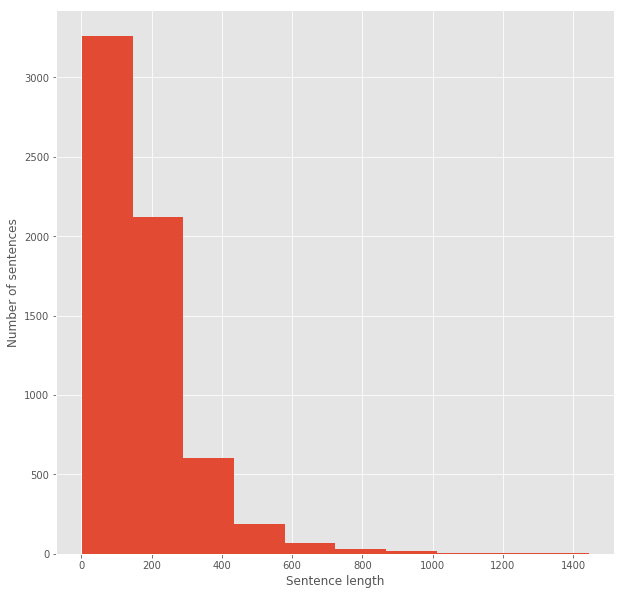

In [213]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Splitting the data into Test and Train

In [214]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.20)

In [215]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5029, 500)
(1258, 500)
(5029,)
(1258,)


In [216]:
y_train.shape

(5029,)

In [217]:
y_train

array([0, 1, 1, ..., 1, 2, 2])

# Using Embedding Layer and Classifier on the Hotels Data

In [218]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten,Activation,BatchNormalization,Conv2D,MaxPooling2D
from keras.models import Sequential
model = Sequential() 
model.add(Embedding(21371, 8, input_length=maxlen))# Specifies the max input length to the embedding layer, 
                                                   #so we can latter flatten the embeded inputs,
                                                   # After Embedding Layer the activation will have shape of (samples, maxlen,8)
model.add(Flatten())# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples,maxlen * 8)
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [219]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 8)            170968    
_________________________________________________________________
flatten_14 (Flatten)         (None, 4000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 12003     
Total params: 182,971
Trainable params: 182,971
Non-trainable params: 0
_________________________________________________________________


In [220]:
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=100, callbacks=[checkpointer])

Train on 3771 samples, validate on 1258 samples
Epoch 1/100
3771/3771 [==============================] - 1s 267us/step - loss: 1.0070 - acc: 0.5137 - val_loss: 1.0350 - val_acc: 0.4777

Epoch 00001: val_acc improved from -inf to 0.47774, saving model to weights-simple.hdf5
Epoch 2/100
3771/3771 [==============================] - 0s 108us/step - loss: 0.9649 - acc: 0.5256 - val_loss: 1.0085 - val_acc: 0.4809

Epoch 00002: val_acc improved from 0.47774 to 0.48092, saving model to weights-simple.hdf5
Epoch 3/100
3771/3771 [==============================] - 0s 114us/step - loss: 0.8908 - acc: 0.5434 - val_loss: 0.9511 - val_acc: 0.5000

Epoch 00003: val_acc improved from 0.48092 to 0.50000, saving model to weights-simple.hdf5
Epoch 4/100
3771/3771 [==============================] - 0s 121us/step - loss: 0.7630 - acc: 0.6492 - val_loss: 0.8596 - val_acc: 0.5556

Epoch 00004: val_acc improved from 0.50000 to 0.55564, saving model to weights-simple.hdf5
Epoch 5/100
3771/3771 [================

3771/3771 [==============================] - 0s 113us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.3623 - val_acc: 0.6296

Epoch 00085: val_acc did not improve from 0.64706
Epoch 86/100
3771/3771 [==============================] - 0s 123us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3718 - val_acc: 0.6280

Epoch 00086: val_acc did not improve from 0.64706
Epoch 87/100
3771/3771 [==============================] - 0s 121us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.3863 - val_acc: 0.6288

Epoch 00087: val_acc did not improve from 0.64706
Epoch 88/100
3771/3771 [==============================] - 0s 122us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.3875 - val_acc: 0.6296

Epoch 00088: val_acc did not improve from 0.64706
Epoch 89/100
3771/3771 [==============================] - 0s 114us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.3982 - val_acc: 0.6272

Epoch 00089: val_acc did not improve from 0.64706
Epoch 90/100
3771/3771 [==============================] - 0s 119us/s

Using Embedding Layer and a Classifier we got Validation accuracy of 0.64706
Understanding the Model Fit

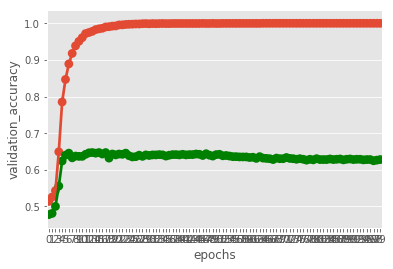

In [221]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')


# Plotting the results


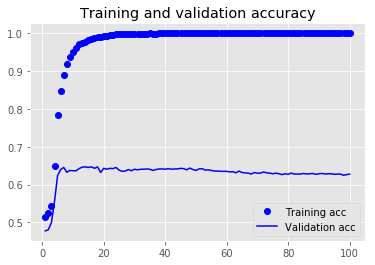

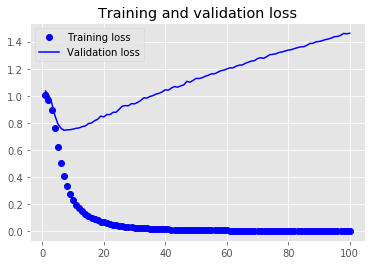

In [222]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [223]:
y_test

array([2, 0, 2, ..., 1, 1, 1])

In [224]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.6351351351351351

In [225]:
y_test


array([2, 0, 2, ..., 1, 1, 1])

In [226]:
predicted


array([2, 1, 2, ..., 1, 1, 1], dtype=int64)

In [227]:
model.evaluate(X_test,to_categorical(y_test))


1258/1258 [==============================] - 0s 37us/step


[1.515228102051776, 0.635135135324657]

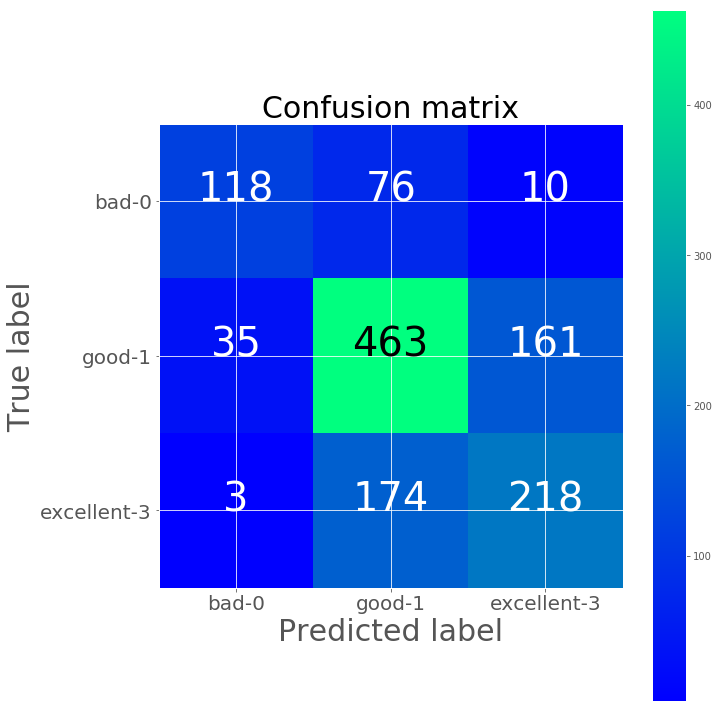

Embedding Layer Confusion Matrix
[[118  76  10]
 [ 35 463 161]
 [  3 174 218]]
TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [229]:
cm3 = confusion_matrix(y_test, predicted)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm3, classes=['bad-0','good-1','excellent-2'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)


# True Posstives are further increased with Embedded Model
. Bag of Words True Possitives: 431(good)
. TFIDF on BOW True Possitives: 424
. Embedded Model True Possitives: 463

In [230]:
max_words = 21371
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [231]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 100)          2137100   
_________________________________________________________________
flatten_15 (Flatten)         (None, 50000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1600032   
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 99        
Total params: 3,737,231
Trainable params: 3,737,231
Non-trainable params: 0
_________________________________________________________________


In [232]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc'])

In [233]:
filepath="weights-simple-relu.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_relu = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=25, callbacks=[checkpointer])

Train on 3771 samples, validate on 1258 samples
Epoch 1/25
3771/3771 [==============================] - 8s 2ms/step - loss: 1.0302 - acc: 0.5078 - val_loss: 1.0339 - val_acc: 0.4746

Epoch 00001: val_acc improved from -inf to 0.47456, saving model to weights-simple-relu.hdf5
Epoch 2/25
3771/3771 [==============================] - 6s 2ms/step - loss: 0.8829 - acc: 0.5431 - val_loss: 0.9976 - val_acc: 0.4889

Epoch 00002: val_acc improved from 0.47456 to 0.48887, saving model to weights-simple-relu.hdf5
Epoch 3/25
3771/3771 [==============================] - 6s 2ms/step - loss: 0.4435 - acc: 0.8290 - val_loss: 0.8823 - val_acc: 0.5930

Epoch 00003: val_acc improved from 0.48887 to 0.59300, saving model to weights-simple-relu.hdf5
Epoch 4/25
3771/3771 [==============================] - 6s 2ms/step - loss: 0.0954 - acc: 0.9756 - val_loss: 0.8776 - val_acc: 0.5978

Epoch 00004: val_acc improved from 0.59300 to 0.59777, saving model to weights-simple-relu.hdf5
Epoch 5/25
3771/3771 [=========

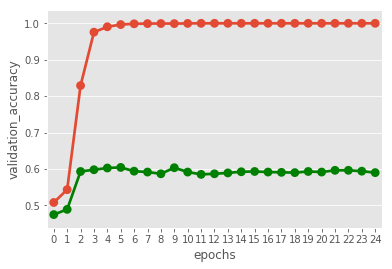

In [234]:
df = pd.DataFrame({'epochs':history_relu.epoch, 'accuracy': history_relu.history['acc'], 'validation_accuracy': history_relu.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

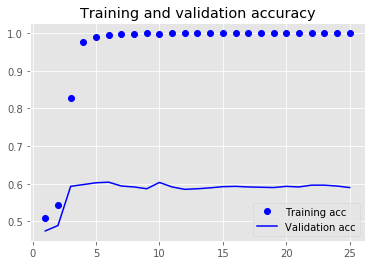

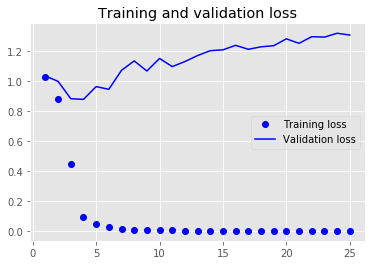

In [235]:
import matplotlib.pyplot as plt
acc = history_relu.history['acc']
val_acc = history_relu.history['val_acc']
loss = history_relu.history['loss']
val_loss = history_relu.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [236]:
model.load_weights('weights-simple-relu.hdf5')
predicted_relu = model.predict(X_test)
predicted_relu

array([[0.00680321, 0.4311847 , 0.5620121 ],
       [0.03397697, 0.8728946 , 0.09312844],
       [0.07283787, 0.49044222, 0.43671992],
       ...,
       [0.00238001, 0.98697996, 0.01064007],
       [0.0018169 , 0.93115133, 0.06703184],
       [0.00930815, 0.8437861 , 0.14690575]], dtype=float32)

In [237]:
# Understanding Softmax
predicted_relu = np.argmax(predicted_relu, axis=1)

In [238]:
predicted_relu


array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [239]:
# Let us look at the accuracy
accuracy_score(y_test, predicted_relu)

0.5763116057233705

In [240]:
scores = model.evaluate(X_test, to_categorical(y_test), verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 57.63%


In [241]:
accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

1258/1258 [==============================] - 0s 395us/step
Test set
  Loss: 94.891
  Accuracy: 57.631


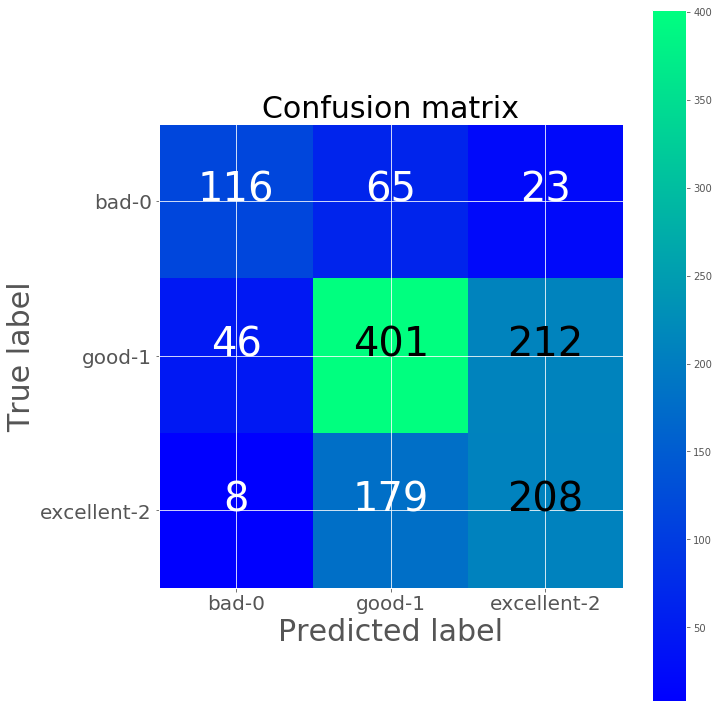

Embedding Layer with Relu Confusion Matrix
[[116  65  23]
 [ 46 401 212]
 [  8 179 208]]
Embedding Layer Confusion Matrix
[[118  76  10]
 [ 35 463 161]
 [  3 174 218]]
TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [242]:
cm4 = confusion_matrix(y_test, predicted_relu)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm4, classes=['bad-0','good-1','excellent-2'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

In [ ]:
True Posstives are further decreased with Embedded Model

# Using Simple RNN

In [244]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='softmax'))


In [245]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [246]:
from keras.callbacks import EarlyStopping
filepath="weights-simpleRNN.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_SimpleRNN = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=25, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Train on 3771 samples, validate on 1258 samples
Epoch 1/25
3771/3771 [==============================] - 9s 2ms/step - loss: 1.0262 - acc: 0.4946 - val_loss: 1.0610 - val_acc: 0.4738
Epoch 2/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.9037 - acc: 0.5861 - val_loss: 1.0546 - val_acc: 0.4603
Epoch 3/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.6341 - acc: 0.7926 - val_loss: 1.1070 - val_acc: 0.4475
Epoch 4/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.3131 - acc: 0.9390 - val_loss: 1.2556 - val_acc: 0.4126
Epoch 5/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.1338 - acc: 0.9838 - val_loss: 1.3653 - val_acc: 0.4181
Epoch 6/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.0648 - acc: 0.9950 - val_loss: 1.4694 - val_acc: 0.3975
Epoch 7/25
3771/3771 [==============================] - 8s 2ms/step - loss: 0.0392 - acc: 0.9966 - val_loss: 1.5209 - val_acc: 0.4157
Epoch 8/25
377

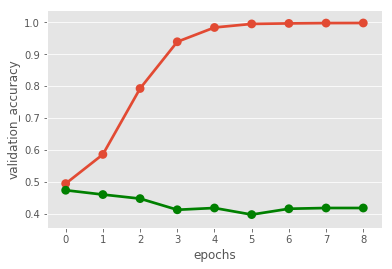

In [247]:
df = pd.DataFrame({'epochs':history_SimpleRNN.epoch, 'accuracy': history_SimpleRNN.history['acc'], 'validation_accuracy': history_SimpleRNN.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

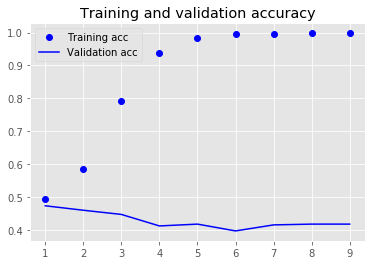

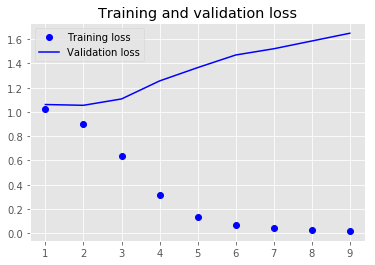

In [248]:
import matplotlib.pyplot as plt
acc = history_SimpleRNN.history['acc']
val_acc = history_SimpleRNN.history['val_acc']
loss = history_SimpleRNN.history['loss']
val_loss = history_SimpleRNN.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [250]:
predicted_simpleRNN = model.predict(X_test)
print(predicted_simpleRNN)

predicted_simpleRNN = np.argmax(predicted_simpleRNN, axis=1)

print(predicted_simpleRNN)

print(accuracy_score(y_test, predicted_simpleRNN))

accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

[[0.1617577  0.44326732 0.39497498]
 [0.05722041 0.02333451 0.9194451 ]
 [0.00743569 0.5944714  0.39809293]
 ...
 [0.00393932 0.986811   0.00924966]
 [0.01148275 0.9080872  0.08043009]
 [0.07029737 0.8768424  0.05286032]]
[1 2 1 ... 1 1 1]
0.45151033386327505
1258/1258 [==============================] - 1s 935us/step
Test set
  Loss: 150.346
  Accuracy: 45.151


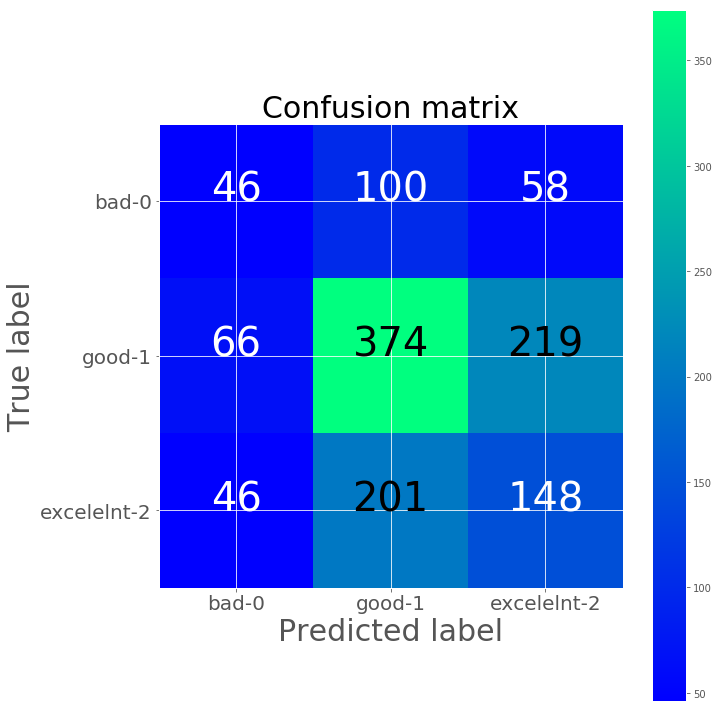

Embedding Layer with SimpleRNN Confusion Matrix
[[ 46 100  58]
 [ 66 374 219]
 [ 46 201 148]]
Embedding Layer with Relu Confusion Matrix
[[116  65  23]
 [ 46 401 212]
 [  8 179 208]]
Embedding Layer Confusion Matrix
[[118  76  10]
 [ 35 463 161]
 [  3 174 218]]
TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [253]:
cm5 = confusion_matrix(y_test, predicted_simpleRNN)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm5, classes=['bad-0','good-1','excelelnt-2'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with SimpleRNN Confusion Matrix")
print(cm5)
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

# Using the LSTM Layer

In [255]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

In [256]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['acc'])

In [257]:
filepath="weights-simple-LSTM.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_relu = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Train on 3771 samples, validate on 1258 samples
Epoch 1/10
3771/3771 [==============================] - 27s 7ms/step - loss: 1.0280 - acc: 0.5107 - val_loss: 1.0458 - val_acc: 0.4738

Epoch 00001: val_acc improved from -inf to 0.47377, saving model to weights-simple-LSTM.hdf5
Epoch 2/10
3771/3771 [==============================] - 24s 6ms/step - loss: 0.9518 - acc: 0.5200 - val_loss: 0.9544 - val_acc: 0.4793

Epoch 00002: val_acc improved from 0.47377 to 0.47933, saving model to weights-simple-LSTM.hdf5
Epoch 3/10
3771/3771 [==============================] - 24s 6ms/step - loss: 0.8160 - acc: 0.6097 - val_loss: 0.8739 - val_acc: 0.5684

Epoch 00003: val_acc improved from 0.47933 to 0.56836, saving model to weights-simple-LSTM.hdf5
Epoch 4/10
3771/3771 [==============================] - 24s 6ms/step - loss: 0.6510 - acc: 0.7184 - val_loss: 0.8285 - val_acc: 0.6335

Epoch 00004: val_acc improved from 0.56836 to 0.63355, saving model to weights-simple-LSTM.hdf5
Epoch 5/10
3771/3771 [=====

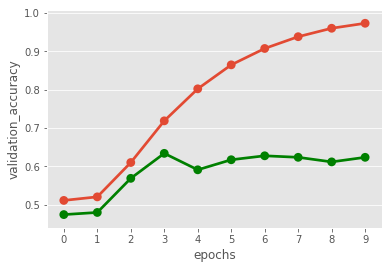

In [258]:
df = pd.DataFrame({'epochs':history_relu.epoch, 'accuracy': history_relu.history['acc'], 'validation_accuracy': history_relu.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

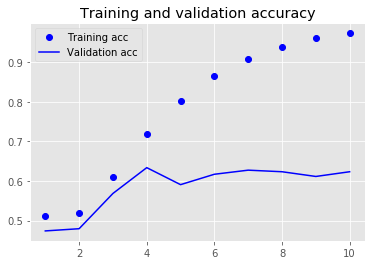

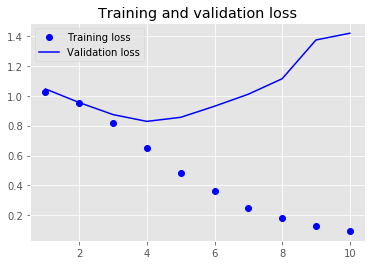

In [259]:
import matplotlib.pyplot as plt
acc = history_relu.history['acc']
val_acc = history_relu.history['val_acc']
loss = history_relu.history['loss']
val_loss = history_relu.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [260]:
predicted_LSTM = model.predict(X_test)
print(predicted_LSTM)

predicted_LSTM = np.argmax(predicted_LSTM, axis=1)

print(predicted_LSTM)

print(accuracy_score(y_test, predicted_LSTM))

accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

[[3.71644652e-04 8.36431608e-02 9.15985167e-01]
 [4.40223608e-04 9.96237040e-01 3.32265091e-03]
 [1.93650238e-04 1.05442172e-02 9.89262164e-01]
 ...
 [2.60553148e-04 9.98057306e-01 1.68215972e-03]
 [1.17317226e-03 1.00536935e-01 8.98289859e-01]
 [2.52639409e-04 6.67794645e-02 9.32967842e-01]]
[2 1 2 ... 1 2 2]
0.6104928457869634
1258/1258 [==============================] - 2s 2ms/step
Test set
  Loss: 142.596
  Accuracy: 61.049


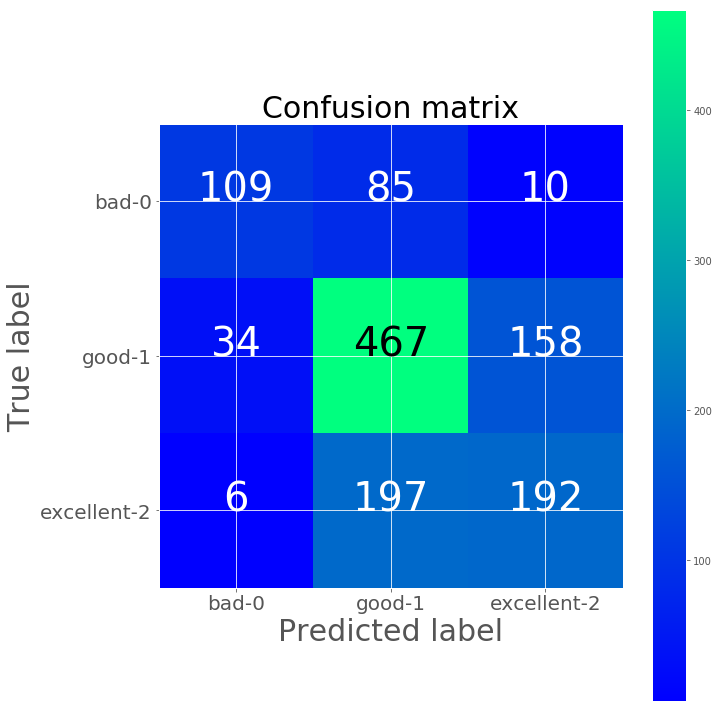

Embedding Layer with LSTM Confusion Matrix
[[109  85  10]
 [ 34 467 158]
 [  6 197 192]]
Embedding Layer with SimpleRNN Confusion Matrix
[[ 46 100  58]
 [ 66 374 219]
 [ 46 201 148]]
Embedding Layer with Relu Confusion Matrix
[[116  65  23]
 [ 46 401 212]
 [  8 179 208]]
Embedding Layer Confusion Matrix
[[118  76  10]
 [ 35 463 161]
 [  3 174 218]]
TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [261]:
cm6 = confusion_matrix(y_test, predicted_LSTM)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm6, classes=['bad-0','good-1','excellent-2'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with LSTM Confusion Matrix")
print(cm6)
print("Embedding Layer with SimpleRNN Confusion Matrix")
print(cm5)
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)

# LSTM with Drop Out

In [265]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [266]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['acc'])

In [273]:
filepath="weights-simple-LSTM-Dropout.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history_LSTM_Dropout = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=100, callbacks=[checkpointer])

Train on 3771 samples, validate on 1258 samples
Epoch 1/100
3771/3771 [==============================] - 24s 6ms/step - loss: 0.2645 - acc: 0.8992 - val_loss: 1.1209 - val_acc: 0.6240

Epoch 00001: val_acc improved from -inf to 0.62401, saving model to weights-simple-LSTM-Dropout.hdf5
Epoch 2/100
3771/3771 [==============================] - 24s 6ms/step - loss: 0.1922 - acc: 0.9382 - val_loss: 1.3155 - val_acc: 0.6224

Epoch 00002: val_acc did not improve from 0.62401
Epoch 3/100
3771/3771 [==============================] - 24s 6ms/step - loss: 0.1336 - acc: 0.9560 - val_loss: 1.5991 - val_acc: 0.6041

Epoch 00003: val_acc did not improve from 0.62401
Epoch 4/100
3771/3771 [==============================] - 24s 6ms/step - loss: 0.0938 - acc: 0.9730 - val_loss: 1.8175 - val_acc: 0.5827

Epoch 00004: val_acc did not improve from 0.62401
Epoch 5/100
3771/3771 [==============================] - 24s 6ms/step - loss: 0.0898 - acc: 0.9737 - val_loss: 1.7272 - val_acc: 0.6129

Epoch 00005: val

KeyboardInterrupt: 

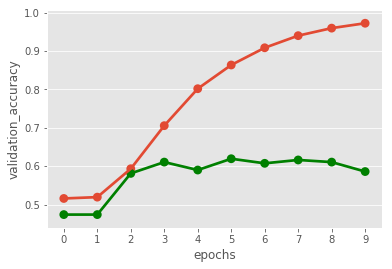

In [268]:
df = pd.DataFrame({'epochs':history_LSTM_Dropout.epoch, 'accuracy': history_LSTM_Dropout.history['acc'], 'validation_accuracy': history_LSTM_Dropout.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

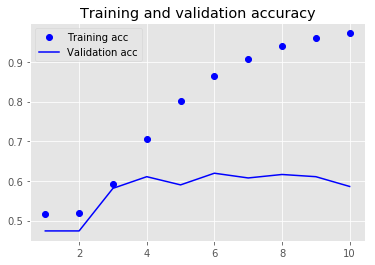

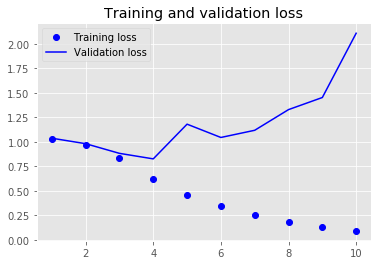

In [269]:
import matplotlib.pyplot as plt
acc = history_LSTM_Dropout.history['acc']
val_acc = history_LSTM_Dropout.history['val_acc']
loss = history_LSTM_Dropout.history['loss']
val_loss = history_LSTM_Dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [270]:
model.load_weights('weights-simple-LSTM-Dropout.hdf5')
predicted_LSTM_Dropout = model.predict(X_test)
predicted_LSTM_Dropout
predicted_LSTM_Dropout = np.argmax(predicted_LSTM_Dropout, axis=1)

print(predicted_LSTM_Dropout)

print(accuracy_score(y_test, predicted_LSTM_Dropout))

accr = model.evaluate(X_test,to_categorical(y_test))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0]*100,accr[1]*100))

[1 1 2 ... 1 1 1]
0.6104928457869634
1258/1258 [==============================] - 2s 2ms/step
Test set
  Loss: 97.746
  Accuracy: 61.049


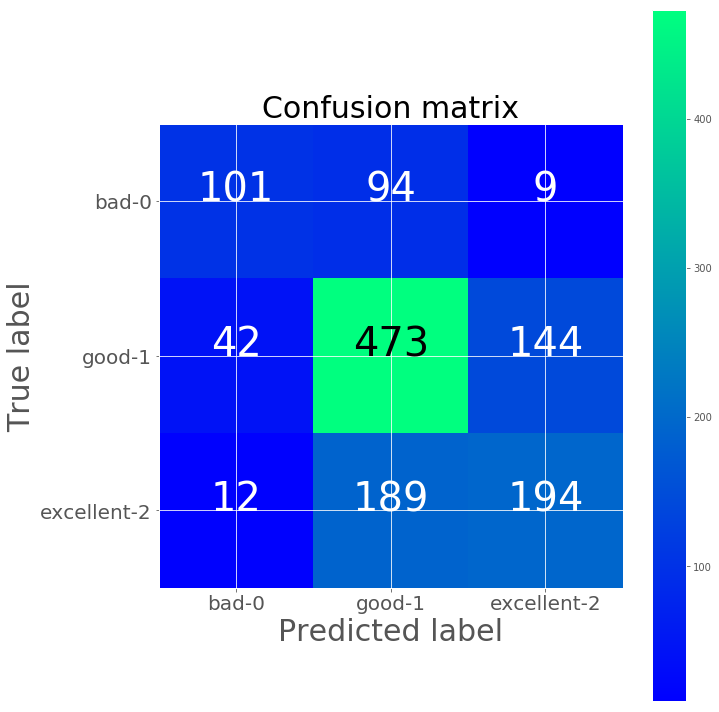

Embedding Layer with LSTM and Dropout Confusion Matrix
[[101  94   9]
 [ 42 473 144]
 [ 12 189 194]]
Embedding Layer with LSTM Confusion Matrix
[[109  85  10]
 [ 34 467 158]
 [  6 197 192]]
Embedding Layer with SimpleRNN Confusion Matrix
[[ 46 100  58]
 [ 66 374 219]
 [ 46 201 148]]
Embedding Layer with Relu Confusion Matrix
[[116  65  23]
 [ 46 401 212]
 [  8 179 208]]
Embedding Layer Confusion Matrix
[[118  76  10]
 [ 35 463 161]
 [  3 174 218]]
TFIDF confusion matrix
[[187  33   5]
 [ 69 424 140]
 [  9 119 272]]
Bag of Words confusion matrix
[[182  34   9]
 [ 65 431 137]
 [ 13 126 261]]


In [272]:
cm7 = confusion_matrix(y_test, predicted_LSTM_Dropout)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm7, classes=['bad-0','good-1','excellent-2'], normalize=False, title='Confusion matrix')
plt.show()
print("Embedding Layer with LSTM and Dropout Confusion Matrix")
print(cm7)
print("Embedding Layer with LSTM Confusion Matrix")
print(cm6)
print("Embedding Layer with SimpleRNN Confusion Matrix")
print(cm5)
print("Embedding Layer with Relu Confusion Matrix")
print(cm4)
print("Embedding Layer Confusion Matrix")
print(cm3)
print("TFIDF confusion matrix")
print(cm2)
print("Bag of Words confusion matrix")
print(cm)